In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import yfinance as yf

In [10]:
# Fetch historical stock data
stock_data = yf.download('AAPL', start='2018-01-01', end='2023-01-01')

# Display the first few rows
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.568932,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.561855,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.750271,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.214241,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.061138,82271200


In [11]:
# Drop the Volume column
stock_data = stock_data[['Open', 'High', 'Low', 'Close']]

# Check for any missing values
stock_data.isna().sum()

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(stock_data)

# Convert scaled data back to DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=stock_data.columns)


In [12]:
def create_features_labels(data, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i])
        y.append(data[i, 3])  # 3 is the index for 'Close' column
    return np.array(X), np.array(y)

# Create features and labels
X, y = create_features_labels(scaled_data.values)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Reshape data for Linear Regression model
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Initialize the model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_reshaped, y_train)

# Predict on the test set
y_pred = linear_model.predict(X_test_reshaped)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)


Mean Squared Error:  0.00039000314182306483


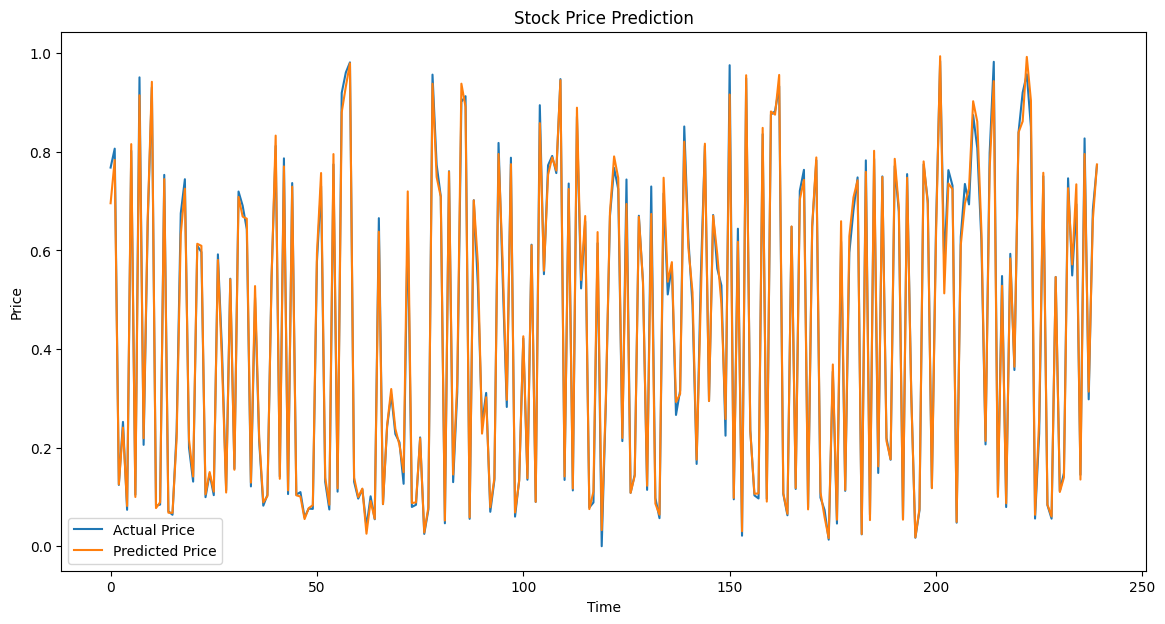

In [14]:
# Plot actual vs predicted closing prices
plt.figure(figsize=(14,7))
plt.plot(y_test, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


Epoch 1/20


c:\Users\kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0775
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0031
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0011
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0012
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0011
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0011
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 9.4917e-04
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 9.5623e-04
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 9.6859e-04
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 9.6020e-04
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0010
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 9.2164e-04
Epoch 13/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 8.7920e-04
Epoch 14/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 7.8078e-04
Epoch 15/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - 

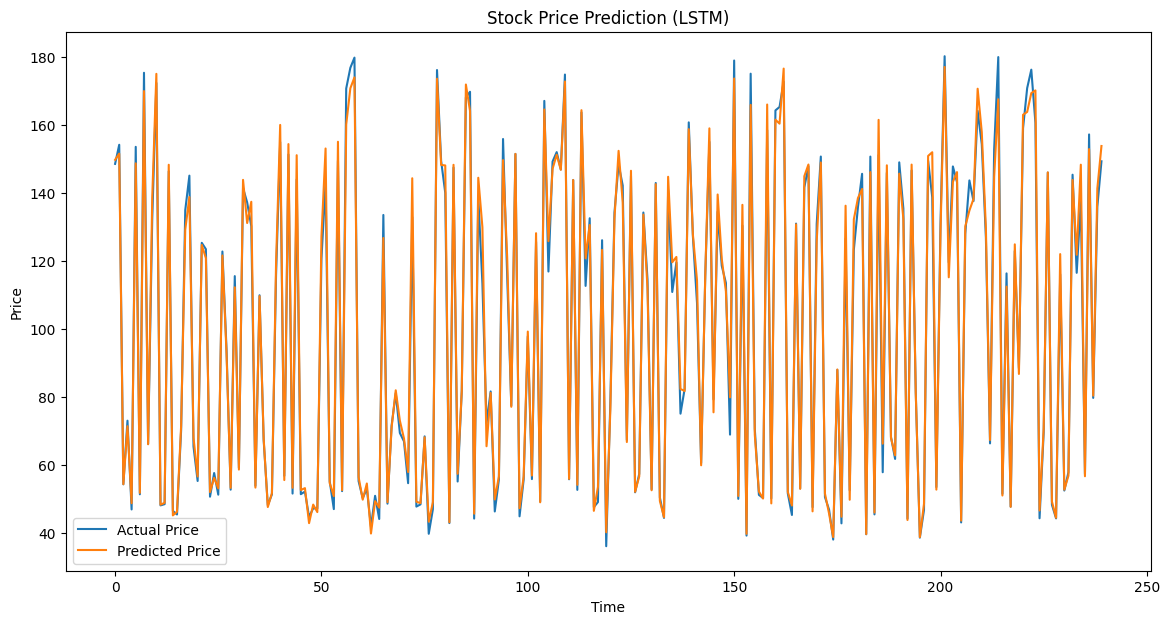

In [16]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 4)))
model.add(LSTM(units=50))
model.add(Dense(units=1))  # Output layer for predicted price

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Predict on the test set
y_pred_lstm = model.predict(X_test)

# Invert the scaling for both the predictions and the actual values
# Assuming that scaler was fitted with 4 features, we need to handle the scaling accordingly

# To prevent shape issues, we can repeat the predictions across 4 columns
y_pred_lstm_scaled = np.repeat(y_pred_lstm, 4, axis=1)

# Now inverse transform using the scaler (which expects 4 columns)
y_pred_lstm = scaler.inverse_transform(y_pred_lstm_scaled)[:, 0]  # Take only the first column (the predicted price)

# Invert scaling for the actual y_test values
# First, ensure y_test is reshaped to 2D if it's 1D
y_test_reshaped = y_test.reshape(-1, 1)  # Reshape to 2D (e.g., from (240,) to (240, 1))

# Now repeat y_test across 4 columns
y_test_scaled = np.repeat(y_test_reshaped, 4, axis=1)  # Repeat y_test to match the scaler's expected shape
y_test_actual = scaler.inverse_transform(y_test_scaled)[:, 0]  # Take only the first column (the actual price)

# Plot actual vs predicted for LSTM
plt.figure(figsize=(14,7))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(y_pred_lstm, label='Predicted Price')
plt.title('Stock Price Prediction (LSTM)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [17]:
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
print("LSTM Mean Squared Error: ", mse_lstm)


LSTM Mean Squared Error:  12139.663593028901


Understanding the Lower MSE of Linear Regression

    Linear regression is a simpler model that assumes a linear relationship between the input features (e.g., past stock prices) and the output (the future stock price).
    
    LSTM (Long Short-Term Memory) is a more complex model designed to capture long-term dependencies in sequential data, such as time series. While it may capture more subtle patterns in the data, it can sometimes overfit on small datasets or noisy data, leading to a higher MSE during testing.

Example of Sequential and Time-Based Dependencies in Stock Prediction:

Let’s imagine you’re predicting the closing price of a stock for Day 6 based on the previous 5 days:
Day	        Closing Price ($)
1    	    100
2	        102
3	        104
4	        103
5	        105
6	        ???


Linear Regression:

    Linear regression would only look at the relationship between the closing prices on each day and predict the Day 6 closing price based on a static relationship with the previous prices (e.g., assuming a linear trend).
    It would predict the Day 6 price based on the assumption that stock prices move in a fixed, linear fashion, without any knowledge of sequential patterns.

LSTM:

    The LSTM model, on the other hand, would remember the sequence of stock prices from Days 1 to 5. It would capture not only the general upward trend but also the slight dip on Day 4.
    LSTM would use this sequence to make a more informed prediction for Day 6, understanding that stock prices don’t always move linearly but might exhibit complex, sequential patterns.